In [1]:
from solver import psi

# Number of time points
n = 200000

# Generate wavefunction, spatial grid (x), time grid (t), and potential (A)
# psi function takes parameters: [x_min, n_x, t_min, n_t], number of experiments
wavefunction, x, t, A = psi([-200, 4097, -200, n], n_of_exp=1)

Time Propagation: 100%|██████████| 200000/200000 [02:37<00:00, 1270.28it/s]


(5000,)


Wavelet Transform: 100%|██████████| 278/278 [14:15<00:00,  3.08s/it]


In [2]:
import os
import numpy as np

# Specify the folder path
folder_path = './results'

# List to store loaded arrays
numpy_arrays = []

# Loop through files in the directory
for file in os.listdir(folder_path):
    if file.startswith('A') and file.endswith('.npy'):  # Check if file starts with 'A' and ends with '.npy'
        file_path = os.path.join(folder_path, file)
        try:
            array = np.load(file_path)
            numpy_arrays.append((file, array))  # Append tuple (filename, array)
            print(f"Loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Display summary
print(f"\nTotal files loaded: {len(numpy_arrays)}")


Loaded: A_2024-12-16_00-46-36.npy
Loaded: A_2024-12-17_11-50-07.npy
Loaded: A_2024-12-17_12-53-27.npy

Total files loaded: 3


A_2024-12-16_00-46-36.npy: (278, 5000)
A_2024-12-17_11-50-07.npy: (278, 5000)
A_2024-12-17_12-53-27.npy: (278, 5000)


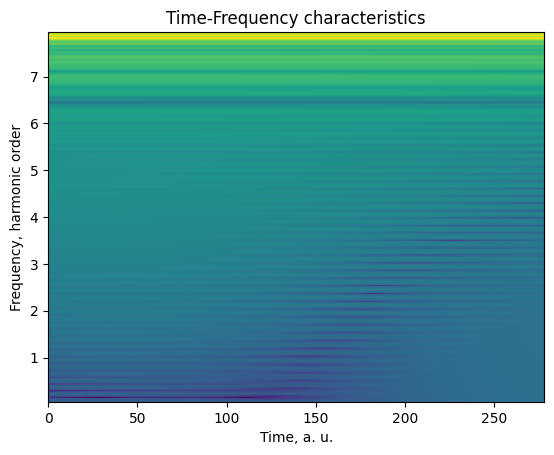

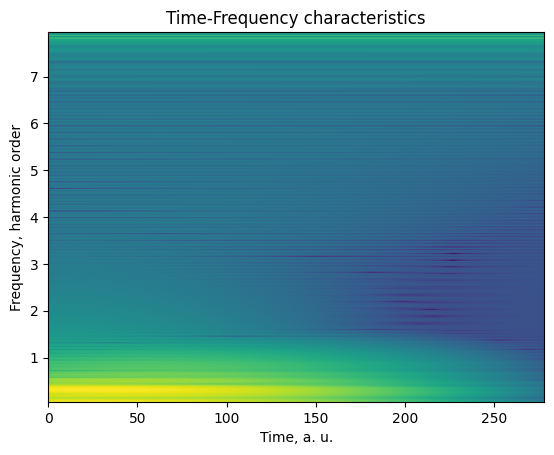

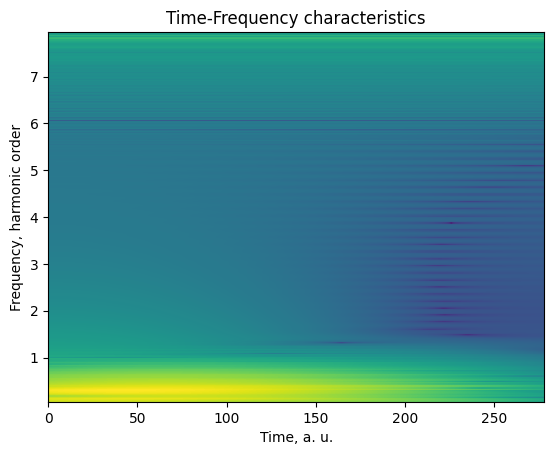

In [4]:
import matplotlib.pyplot as plt
from wavelet_visualization import *

# Loop through each loaded numpy array
for file, A in numpy_arrays:
    # Print the filename and shape of the array
    print(f"{file}: {A.shape}")
    # Visualize the time-frequency characteristics of the array
    imshow_time_frequency_characteristics(A)

# Display all plots
plt.show()


A_2024-12-16_00-46-36.npy: (278, 5000)
A_2024-12-17_11-50-07.npy: (278, 5000)
A_2024-12-17_12-53-27.npy: (278, 5000)


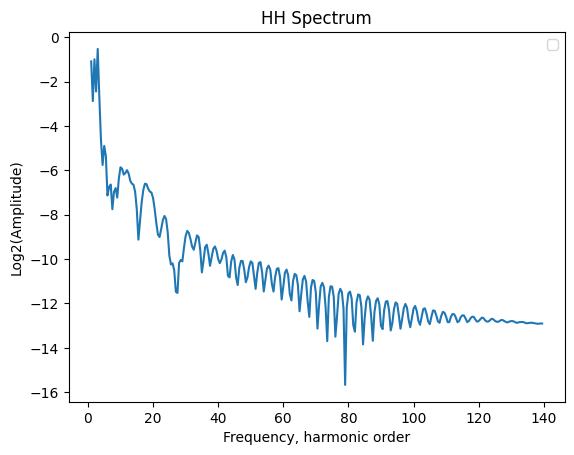

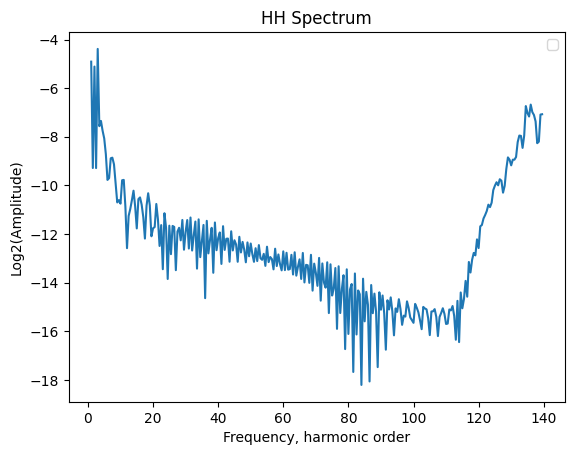

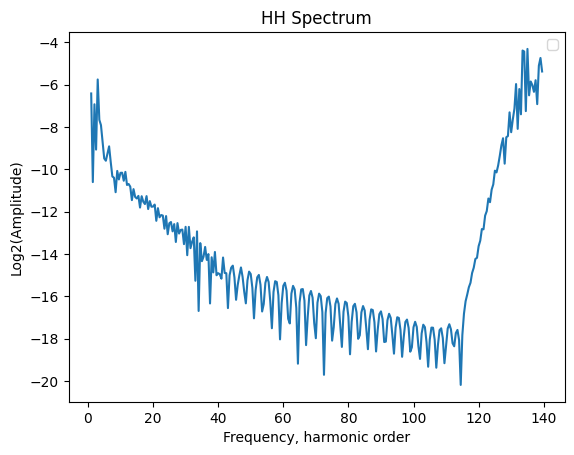

In [7]:
from parameters import pars_YanPengPhysRevA_78_033821

# Retrieve parameters
params = pars_YanPengPhysRevA_78_033821()[1]

# Loop through each loaded numpy array
for file, A in numpy_arrays:
    # Print the filename and shape of the array
    print(f"{file}: {A.shape}")
    # Plot the high-harmonic spectrum using the array and parameters
    n = A.shape[1]
    plot_HH_spectrum(n//2 + n//3, A, params)

# Display all plots
plt.show()
